# Script to analyze whole SNP-data

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

In [66]:
### Load the Data
data_path = "Data/CB108.impute.geno.gz"

print("Loading...")
df = pd.read_csv(data_path, compression='gzip', sep="\t")
print("Finished loading. Markers: %i" % len(df))
print("Nr. of Individuals: %i" % (df.shape[1]-4))
df.head(2)

Loading...
Finished loading. Markers: 237013
Nr. of Individuals: 108


,#CHROM,POS,REF,ALT,CB001,CB047,RP290,CB061,CB063,CB068,...,CB412,CB414,CB416,CB417,CB418,CB475,CB477,CB478,CB479,CB480
0,Scaffold10021,70637,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Scaffold10021,70641,A,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Do some preliminary Analysis:

In [67]:
# Extract the SNP Matrix:
snp_df = df.iloc[:,4:]
snp_df.head(3)

,CB001,CB047,RP290,CB061,CB063,CB068,CB073,CB074,CB075,CB077,...,CB412,CB414,CB416,CB417,CB418,CB475,CB477,CB478,CB479,CB480
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


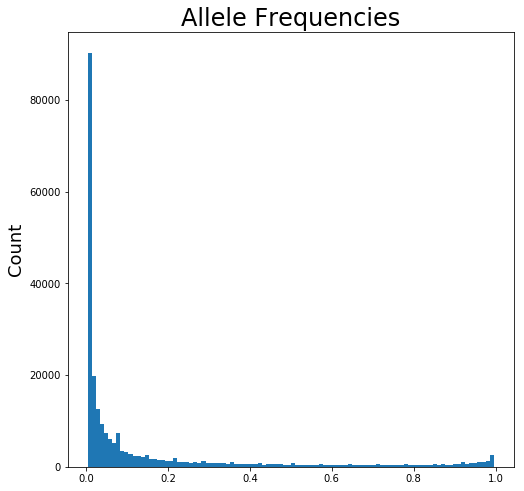

SNPs of frequency 0.2-0.8: 37421 out of 237013


In [150]:
# Plot allele frequency spectrum:
p_means = np.mean(snp_df/2.0,axis=1)

plt.figure(figsize=(8,8))
plt.hist(p_means,bins=100)
plt.title("Allele Frequencies", fontsize=24)
plt.ylabel("Count", fontsize=18)
plt.show()

p_means_intermediate = p_means[(0.2<p_means.values) & (p_means.values<0.8)]
print("SNPs of frequency 0.2-0.8: %i out of %i" % (len(p_means_intermediate),len(p_means)))

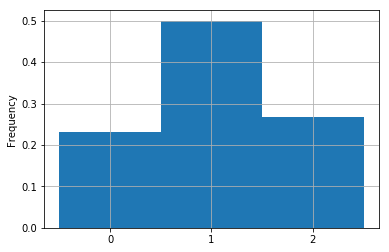

In [78]:
# Look into heterozygosity:

# Look into empirical Heterozygosity:
# 1) Calculate Empirical Heterozygosity:
htz = np.mean(snp_df==1,axis=1)     # Calculate the empirical heterozygosity
exp_htz = 2.0 * p_means * (1-p_means)     # Calculate the expected heterozygosity

# The Most Heterozygous Marker:
snp_df.iloc[121259,:]
plt.figure()
plt.hist(snp_df.iloc[121259,:], bins=[-0.5,0.5,1.5,2.5],normed="True")
plt.xticks([0,1,2])
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

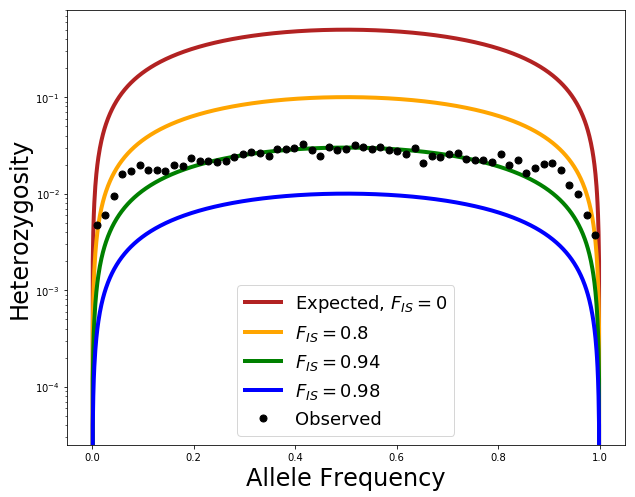

In [149]:
# Plot Heterozygosities:

# Calculate Empirical Heterozygosity:
htz = np.mean(snp_df==1,axis=1)     # Calculate the empirical heterozygosity

x_array = np.linspace(0,1,1000) # For the Plot
y = 2*x_array*(1-x_array) # Expected Heterozygosity
y_01 = 2*x_array*(1-x_array) * 0.2 # For F_IS=0.8
y_02 = 2*x_array*(1-x_array) * 0.06 # For F_IS=0.94
y_03 = 2*x_array*(1-x_array) * 0.02 # For F_IS=0.98

# Calculate the bin values:
bins = np.linspace(0,1,60) # Make 100 Bins.
mean_hzs, bin_edges, _ = binned_statistic(p_means, htz, statistic='mean', bins=bins)

means = (bin_edges[1:] + bin_edges[:-1])/2.0


plt.figure(figsize=(10,8))
plt.plot(x_array, y, linewidth=4, label=r"Expected, $F_{IS}=0$", color="FireBrick")
plt.plot(x_array, y_01, linewidth=4, label=r"$F_{IS}=0.8$", color="Orange")
plt.plot(x_array, y_02, linewidth=4, label=r"$F_{IS}=0.94$", color="Green")
plt.plot(x_array, y_03, linewidth=4, label=r"$F_{IS}=0.98$", color="Blue")

# Plot The Observed Values
plt.plot(means, mean_hzs, "o", color="Black", label="Observed", markersize=7)
plt.ylabel("Heterozygosity", fontsize=24)
plt.xlabel("Allele Frequency", fontsize=24)
plt.yscale("log")
plt.legend(fontsize=18)
plt.show()

## Some Area 51 stuff:

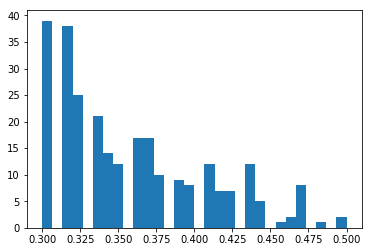

0.5


In [151]:
plt.figure()
plt.hist(htz, bins=30, range=[0.3,0.5])
plt.show()
print(np.max(htz))